In [65]:
import sys
sys.path.insert(0, '..')

from NtupleDataFormat import HGCalNtuple
import root_numpy as rnp
import root_numpy.tmva as rnptmva
import pandas as pd
import numpy as np
from multiprocessing import Pool
from shutil import copyfile

# The purpose of this file is to demonstrate mainly the objects
# that are in the HGCalNtuple
import ROOT
import os
import array
import socket
import datetime
import optparse
import yaml

import python.l1THistos as histos
import python.clusterTools as clAlgo
import traceback
import subprocess32
from python.utils import debugPrintOut

import python.file_manager as fm
import python.selections as selections
ROOT.enableJSVis()


In [2]:

maxEvents = 10
input_base_dir = '/Users/cerminar/Workspace/hgcal-analysis/ntuple-tools'
input_sample_dir = 'V9'
debug = 0
tree_name = 'hgcalTriggerNtuplizer/HGCalTriggerNtuple'
    
range_ev = (0, maxEvents)
        
    
input_files = fm.get_files_for_processing(input_dir=os.path.join(input_base_dir,
                                                                 input_sample_dir),
                                          tree=tree_name,
                                          nev_toprocess=maxEvents,
                                          debug=debug)

ntuple = HGCalNtuple(input_files, tree=tree_name)
range_ev = (0, ntuple.nevents())

ntuple.setCache(learn_events=1, entry_range=range_ev)
evt_idx = 0

dir already indexed, will read metadata...
['mkdir: illegal option -- -\n', 'usage: mkdir [-pv] [-m mode] directory ...\n', '[eos-cp] going to copy 1 files and 79 B\n', '\n', '[eos-cp] copied 1/1 files and 79 B in 0.05 seconds with 1662 B/s\n']
Resetting cache: 0
Setting new cache size: 0
Setting # of entries for cache learning: None to 1
Setting cache entry range: 0
Cache size: 400000000


In [3]:
dir(HGCalNtuple)

['PrintCacheStats',
 '__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__iter__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'getEvent',
 'nevents',
 'setCache',
 'tree']

In [4]:
evt_idx+=1

In [5]:
print evt_idx

1


In [6]:
event = ntuple.getEvent(evt_idx)

genParts = event.getDataFrame(prefix='gen')

genParticles = event.getDataFrame(prefix='genpart')
triggerCells = event.getDataFrame(prefix='tc')
cl2ds = event.getDataFrame(prefix='cl')

cl3ds = event.getDataFrame(prefix='cl3d')

dataframe = event.getDataFrame('tc')


In [7]:
genParts

,PUNumInt,TrueNumInt,eta,phi,pt,energy,charge,pdgid,status,daughters
0,NaN,NaN,2.007515,0.500880,25.002361,94.74794,0,22,1,[]
1,NaN,NaN,-2.007515,-2.640713,25.002361,94.74794,0,22,1,[]


In [8]:
genParticles

,eta,phi,pt,energy,dvx,dvy,dvz,ovx,ovy,ovz,...,exx,exy,fbrem,pid,gen,reachedEE,fromBeamPipe,posx,posy,posz
0,2.007515,0.500880,25.002361,94.747932,44.773861,24.512989,186.118851,-0.001475,0.000941,-0.465568,...,76.857414,42.076981,-1.000000,22,1,0,True,[],[],[]
1,-2.007515,-2.640713,25.002361,94.747932,-44.177303,-24.182909,-184.551758,-0.001475,0.000941,-0.465568,...,-76.636902,-41.952766,-1.000000,22,2,0,True,[],[],[]
2,-2.006030,-2.638704,0.851666,3.222817,-71.342194,-48.836521,-319.815002,-44.177303,-24.182909,-184.551758,...,-71.342194,-48.836521,0.000000,11,-1,2,True,"[-71.3422, -71.4831, -71.7187, -71.858, -72.09...","[-48.8365, -49.0408, -49.3852, -49.5906, -49.9...","[-319.815, -320.725, -322.255, -323.165, -324...."
3,-2.007568,-2.640784,24.150698,91.525116,-76.781319,-41.681187,-319.815033,-44.177303,-24.182909,-184.551758,...,-76.781319,-41.681187,0.166588,-11,-1,2,True,"[-76.7813, -77.0016, -77.372, -77.5923, -77.96...","[-41.6812, -41.7971, -41.992, -42.1079, -42.30...","[-319.815, -320.725, -322.255, -323.165, -324...."
4,-2.007495,-2.641077,3.708593,14.053661,-76.643982,-41.941471,-319.815002,-44.897041,-24.576756,-187.550583,...,-76.643982,-41.941471,-1.000000,22,-1,2,True,"[-76.644, -76.8624, -77.2297, -77.4481, -77.81...","[-41.9415, -42.0609, -42.2618, -42.3813, -42.5...","[-319.815, -320.725, -322.255, -323.165, -324...."
5,-2.007467,-2.640962,0.231248,0.876287,-76.642929,-41.945610,-319.815002,-44.905361,-24.581306,-187.585251,...,-76.642929,-41.945610,-1.000000,22,-1,2,True,"[-76.6429, -76.8613, -77.2286, -77.447, -77.81...","[-41.9456, -42.0651, -42.266, -42.3855, -42.58...","[-319.815, -320.725, -322.255, -323.165, -324...."
6,-2.007365,-2.641081,0.083370,0.315888,-76.648346,-41.943680,-319.815002,-45.044342,-24.657331,-188.164230,...,-76.648346,-41.943680,-1.000000,22,-1,2,True,"[-76.6483, -76.8668, -77.2341, -77.4525, -77.8...","[-41.9437, -42.0632, -42.2641, -42.3836, -42.5...","[-319.815, -320.725, -322.255, -323.165, -324...."
7,2.007775,0.500879,6.647272,25.196533,76.309669,43.011234,319.815094,44.773861,24.512989,186.118851,...,76.309669,43.011234,0.017619,11,-1,2,True,"[76.3097, 76.5206, 76.8751, 77.0859, 77.4402, ...","[43.0112, 43.1433, 43.3656, 43.4979, 43.7205, ...","[319.815, 320.725, 322.255, 323.165, 324.695, ..."
8,2.007421,0.500880,18.355091,69.551399,77.046455,41.733082,319.815033,44.773861,24.512989,186.118851,...,77.046455,41.733082,0.006336,-11,-1,2,True,"[77.0465, 77.2673, 77.6387, 77.8597, 78.2311, ...","[41.7331, 41.848, 42.0411, 42.1559, 42.3489, 4...","[319.815, 320.725, 322.255, 323.165, 324.695, ..."
9,2.007429,0.535411,0.117121,0.443802,76.410301,42.860092,319.815002,62.944889,34.872292,262.592346,...,76.410301,42.860092,-1.000000,22,-1,2,True,"[76.4103, 76.6244, 76.9845, 77.1986, 77.5586, ...","[42.8601, 42.9871, 43.2007, 43.3277, 43.5413, ...","[319.815, 320.725, 322.255, 323.165, 324.695, ..."


In [9]:
triggerCells[triggerCells.zside == 1].data.sum()

116224

In [10]:
triggerCells[triggerCells.zside == 1].energy.sum()

90.784821

In [11]:
cl2ds[(cl2ds.eta > 0)].energy.sum()

89.60218

In [12]:
cl3ds[(cl3ds.eta > 0)].energy.sum()

89.594536

In [13]:
triggerCells[triggerCells.zside == 1].id.count()

62

In [14]:
triggerCells[(triggerCells.zside == 1) & (triggerCells.mipPt > 5)].id.count()

37

In [15]:
triggerCells[(triggerCells.zside == 1) & (triggerCells.uncompressedCharge > 280)].id.count()

61

In [16]:
cl2ds[(cl2ds.eta > 0)].id.count()

13

In [17]:
cl3ds[(cl3ds.eta > 0)].id.count()

1

In [18]:
triggerCells[(triggerCells.zside == 1) & (triggerCells.cluster == 0)]

,id,subdet,zside,layer,wafer,wafertype,cell,data,uncompressedCharge,compressedCharge,pt,mipPt,energy,eta,phi,x,y,z,cluster,multicluster
100,1735164711,3,1,13,131,1,39,304,306,83,0.067539,2.461755,0.23746,1.929572,0.429794,90.2006,41.345398,334.455048,0,0.0


In [19]:
triggerCells[(triggerCells.zside == 1) & (triggerCells.cluster == 0)].energy.sum()

0.23746027

In [20]:
triggerCells[(triggerCells.zside == 1) & (triggerCells.cluster == 0)].mipPt.sum()

2.4617548

In [21]:
cl2ds[(cl2ds.eta > 0)].energy.sum()-triggerCells[triggerCells.zside == 1].energy.sum()

-1.1826401

In [22]:
cl2ds[(cl2ds.eta > 0)].mipPt.sum()-triggerCells[triggerCells.zside == 1].mipPt.sum()

-11.547119

In [23]:
cl2ds[(cl2ds.eta > 0)].energy.sum()/triggerCells[triggerCells.zside == 1].energy.sum()

0.98697317

In [24]:
cl2ds[(cl2ds.eta > 0)].mipPt.sum()-triggerCells[(triggerCells.zside == 1) & (triggerCells.cluster != 0)].mipPt.sum()

-9.0854492

In [25]:
cl2ds[(cl2ds.eta > 0)].pt.sum()-triggerCells[triggerCells.zside == 1].pt.sum()

-0.31857681

In [26]:
triggerCells[(triggerCells.zside == 1) & (triggerCells.layer == 5)]

,id,subdet,zside,layer,wafer,wafertype,cell,data,uncompressedCharge,compressedCharge,pt,mipPt,energy,eta,phi,x,y,z,cluster,multicluster
27,1730960899,3,1,5,94,1,3,5632,5622,150,1.159716,42.270779,4.399264,2.008565,0.519668,77.019287,44.064308,324.695038,1730960899,23.915989
28,1730960930,3,1,5,94,1,34,992,993,111,0.202431,7.378447,0.774870,2.017929,0.489851,77.542542,41.345402,324.695038,1730960930,23.915989
29,1730960903,3,1,5,94,1,7,4608,4604,146,0.961187,35.034554,3.599398,1.995175,0.496456,79.112289,42.855904,324.695038,1730960903,23.915989


In [27]:
cl2ds[(cl2ds.eta > 0) & (cl2ds.layer == 5)]

,id,mipPt,pt,energy,eta,phi,layer,subdet,cells,multicluster
10,1730960899,84.683784,2.323158,8.773467,2.003943,0.507467,5,3,"[1730960930, 1730960899, 1730960903]",23.664953


In [28]:
triggerCells[triggerCells.id.isin([1730960933, 1730960929, 1730960930])].mipPt.sum()

7.3784466

In [29]:
cl2ds[(cl2ds.eta > 0)]

,id,mipPt,pt,energy,eta,phi,layer,subdet,cells,multicluster
3,1733058055,120.864754,3.315781,12.570950,2.007977,0.501256,9,3,"[1733058059, 1733058058, 1733058051, 173305805...",23.664953
4,1732009479,131.241806,3.600418,13.597624,2.003985,0.503686,7,3,"[1732009483, 1732009506, 1732009478, 173200947...",23.664953
5,1735155210,117.239288,3.216257,12.135364,2.003011,0.497856,13,3,"[1735155209, 1735155211, 1735155214, 173515520...",23.664953
6,1734106631,113.015228,3.100408,11.776144,2.009892,0.501403,11,3,"[1734106633, 1734106631, 1734106634, 173410662...",23.664953
7,1736203786,102.794151,2.820009,10.698115,2.008633,0.497495,15,3,"[1736203782, 1736203787, 1736203785, 173620378...",23.664953
10,1730960899,84.683784,2.323158,8.773467,2.003943,0.507467,5,3,"[1730960930, 1730960899, 1730960903]",23.664953
11,1737252362,66.430519,1.822417,6.923776,2.010156,0.497139,17,3,"[1737252358, 1737252361, 1737252362, 173725236...",23.664953
13,1729912323,37.987862,1.042110,3.949305,2.007560,0.507692,3,3,"[1729912355, 1729912323, 1729912354]",23.664953
15,1738300938,39.067562,1.071748,4.061763,2.007594,0.495586,19,3,"[1738310424, 1738300937, 1738300935, 173830094...",23.664953
16,1739349517,15.514277,0.425623,1.612221,2.007064,0.502504,21,3,"[1739349514, 1739349517, 1739349513]",23.664953


In [30]:
genParticles

,eta,phi,pt,energy,dvx,dvy,dvz,ovx,ovy,ovz,...,exx,exy,fbrem,pid,gen,reachedEE,fromBeamPipe,posx,posy,posz
0,2.007515,0.500880,25.002361,94.747932,44.773861,24.512989,186.118851,-0.001475,0.000941,-0.465568,...,76.857414,42.076981,-1.000000,22,1,0,True,[],[],[]
1,-2.007515,-2.640713,25.002361,94.747932,-44.177303,-24.182909,-184.551758,-0.001475,0.000941,-0.465568,...,-76.636902,-41.952766,-1.000000,22,2,0,True,[],[],[]
2,-2.006030,-2.638704,0.851666,3.222817,-71.342194,-48.836521,-319.815002,-44.177303,-24.182909,-184.551758,...,-71.342194,-48.836521,0.000000,11,-1,2,True,"[-71.3422, -71.4831, -71.7187, -71.858, -72.09...","[-48.8365, -49.0408, -49.3852, -49.5906, -49.9...","[-319.815, -320.725, -322.255, -323.165, -324...."
3,-2.007568,-2.640784,24.150698,91.525116,-76.781319,-41.681187,-319.815033,-44.177303,-24.182909,-184.551758,...,-76.781319,-41.681187,0.166588,-11,-1,2,True,"[-76.7813, -77.0016, -77.372, -77.5923, -77.96...","[-41.6812, -41.7971, -41.992, -42.1079, -42.30...","[-319.815, -320.725, -322.255, -323.165, -324...."
4,-2.007495,-2.641077,3.708593,14.053661,-76.643982,-41.941471,-319.815002,-44.897041,-24.576756,-187.550583,...,-76.643982,-41.941471,-1.000000,22,-1,2,True,"[-76.644, -76.8624, -77.2297, -77.4481, -77.81...","[-41.9415, -42.0609, -42.2618, -42.3813, -42.5...","[-319.815, -320.725, -322.255, -323.165, -324...."
5,-2.007467,-2.640962,0.231248,0.876287,-76.642929,-41.945610,-319.815002,-44.905361,-24.581306,-187.585251,...,-76.642929,-41.945610,-1.000000,22,-1,2,True,"[-76.6429, -76.8613, -77.2286, -77.447, -77.81...","[-41.9456, -42.0651, -42.266, -42.3855, -42.58...","[-319.815, -320.725, -322.255, -323.165, -324...."
6,-2.007365,-2.641081,0.083370,0.315888,-76.648346,-41.943680,-319.815002,-45.044342,-24.657331,-188.164230,...,-76.648346,-41.943680,-1.000000,22,-1,2,True,"[-76.6483, -76.8668, -77.2341, -77.4525, -77.8...","[-41.9437, -42.0632, -42.2641, -42.3836, -42.5...","[-319.815, -320.725, -322.255, -323.165, -324...."
7,2.007775,0.500879,6.647272,25.196533,76.309669,43.011234,319.815094,44.773861,24.512989,186.118851,...,76.309669,43.011234,0.017619,11,-1,2,True,"[76.3097, 76.5206, 76.8751, 77.0859, 77.4402, ...","[43.0112, 43.1433, 43.3656, 43.4979, 43.7205, ...","[319.815, 320.725, 322.255, 323.165, 324.695, ..."
8,2.007421,0.500880,18.355091,69.551399,77.046455,41.733082,319.815033,44.773861,24.512989,186.118851,...,77.046455,41.733082,0.006336,-11,-1,2,True,"[77.0465, 77.2673, 77.6387, 77.8597, 78.2311, ...","[41.7331, 41.848, 42.0411, 42.1559, 42.3489, 4...","[319.815, 320.725, 322.255, 323.165, 324.695, ..."
9,2.007429,0.535411,0.117121,0.443802,76.410301,42.860092,319.815002,62.944889,34.872292,262.592346,...,76.410301,42.860092,-1.000000,22,-1,2,True,"[76.4103, 76.6244, 76.9845, 77.1986, 77.5586, ...","[42.8601, 42.9871, 43.2007, 43.3277, 43.5413, ...","[319.815, 320.725, 322.255, 323.165, 324.695, ..."


In [31]:
triggerCells.sort_values(by='data', ascending=True)

,id,subdet,zside,layer,wafer,wafertype,cell,data,uncompressedCharge,compressedCharge,pt,mipPt,energy,eta,phi,x,y,z,cluster,multicluster
86,1715233802,3,-1,7,100,1,10,272,267,81,0.057580,2.098746,0.212464,-1.979858,-2.650192,-81.205307,-43.460106,-327.135010,1715233802,22.903515
5,1739349514,3,1,21,94,1,10,272,265,81,0.055078,2.007545,0.212464,2.025935,0.497166,81.205307,44.064308,344.214996,1739349514,23.915989
53,1712088066,3,-1,1,100,1,2,272,274,81,0.022444,2.038722,0.085253,-2.009969,-2.651975,-77.019287,-41.043308,-319.814972,1712088066,22.903515
1,1739358764,3,1,21,130,1,44,288,281,82,0.061361,2.236556,0.224962,1.973168,0.536622,83.871567,49.890808,344.214996,1739358764,23.915989
10,1740398089,3,1,23,94,1,9,288,292,82,0.058623,2.136750,0.224962,2.020534,0.519871,81.205307,46.481106,346.654999,1740398089,23.915989
6,1740407577,3,1,23,131,1,25,304,308,83,0.065475,2.386528,0.237460,1.961901,0.493273,87.584320,47.085289,346.654999,1740407577,23.915989
79,1738300935,3,1,19,94,1,7,304,311,83,0.060453,2.203471,0.237460,2.044667,0.496456,79.112289,42.855904,341.775024,1738300935,23.915989
100,1735164711,3,1,13,131,1,39,304,306,83,0.067539,2.461755,0.237460,1.929572,0.429794,90.200600,41.345398,334.455048,0,0.000000
76,1738310424,3,1,19,131,1,24,320,315,84,0.068261,2.488055,0.249958,1.971916,0.492517,85.491310,45.876881,341.775024,1738310424,23.915989
0,1722583317,3,-1,21,137,1,21,336,337,85,0.071532,2.607300,0.262456,-1.973971,-2.686533,-87.584328,-42.855927,-344.214996,1722583317,22.903515


In [32]:
evt_idx = 0
for idx in range(1,100):
    
    evt_idx+=1
    event = ntuple.getEvent(evt_idx)
    genParts = event.getDataFrame(prefix='gen')

    genParticles = event.getDataFrame(prefix='genpart')
    triggerCells = event.getDataFrame(prefix='tc')
    cl2ds = event.getDataFrame(prefix='cl')

    cl3ds = event.getDataFrame(prefix='cl3d')

    dataframe = event.getDataFrame('tc')

    cl3ds[(cl3ds.eta > 0)].energy.sum()
    if cl3ds[(cl3ds.eta > 0)].pt.sum() > 25:
        print idx, cl3ds[(cl3ds.eta > 0)].energy.sum(), cl3ds[(cl3ds.eta > 0)].pt.sum()



6 97.7713 25.9681
15 95.0612 25.0163
46 93.326 25.0133


In [78]:
h_TC_charge = ROOT.TH1F("h_TC_charge", 'charge', 100, 0, 1000)
h_pt = ROOT.TH1F("hPt", 'pt', 20, 10, 30)
h_nclu = ROOT.TH1F("h_nclu", '# clu', 30, 0, 30)
h_layer = ROOT.TH1F("h_layer", 'layer', 60, 0, 60)
h_layer_tc = ROOT.TH1F("h_layer_tc", 'layer tc', 60, 0, 60)
h_layer_tc1 = ROOT.TH1F("h_layer_tc1", 'layer tc', 60, 0, 60)


Warning in <TROOT::Append>: Replacing existing TH1: h_TC_charge (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hPt (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_nclu (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_layer (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_layer_tc (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_layer_tc1 (Potential memory leak).


In [79]:
for evt_idx in range(0, 100):

    event = ntuple.getEvent(evt_idx)
    genParts = event.getDataFrame(prefix='gen')

    genParticles = event.getDataFrame(prefix='genpart')
    triggerCells = event.getDataFrame(prefix='tc')
    cl2ds = event.getDataFrame(prefix='cl')

    cl3ds = event.getDataFrame(prefix='cl3d')
    cl3ds['nclu'] = [len(x) for x in cl3ds.clusters]

#     dataframe = event.getDataFrame('tc')
#     print evt_idx
    # print triggerCells.loc[0]
    
    rnp.fill_hist(h_TC_charge, triggerCells.uncompressedCharge)
    rnp.fill_hist(h_pt, cl3ds.pt)
    rnp.fill_hist(h_nclu, cl3ds.nclu)
    rnp.fill_hist(h_layer, cl2ds.layer)
    rnp.fill_hist(h_layer_tc, triggerCells.layer)
    rnp.fill_hist(h_layer_tc1, triggerCells[triggerCells.uncompressedCharge>280].layer)


In [76]:
canvas = ROOT.TCanvas()
canvas.cd()
h_TC_charge.Draw()
h_TC_charge.GetYaxis().SetRangeUser(0,415)
canvas.Draw()

In [69]:
canvas = ROOT.TCanvas()
canvas.cd()
h_pt.Draw()
canvas.Draw()

In [70]:
canvas = ROOT.TCanvas()
canvas.cd()
h_nclu.Draw()
canvas.Draw()

In [71]:
canvas = ROOT.TCanvas()
canvas.cd()
h_layer.Draw()
canvas.Draw()

In [82]:
canvas = ROOT.TCanvas()
canvas.cd()
h_layer_tc.Draw()
h_layer_tc.GetYaxis().SetRangeUser(0,1850)

h_layer_tc1.SetLineColor(2)

h_layer_tc1.Draw("same")

canvas.Draw()

In [73]:
dataframe.sort_values(by='pt', ascending=False)


,id,subdet,zside,layer,wafer,wafertype,cell,data,uncompressedCharge,compressedCharge,pt,mipPt,energy,eta,phi,x,y,z,cluster,multicluster
107,1732009479,3,1,7,94,1,7,20480,20845,180,4.242330,154.629700,15.997324,2.002392,0.496456,79.112289,42.855904,327.135010,1732009479,24.510584
75,1733058055,3,1,9,94,1,7,17408,16985,177,3.581142,130.529922,13.597725,2.009559,0.496456,79.112289,42.855904,329.574982,1733058055,24.510584
29,1714185222,3,-1,5,100,1,6,11776,11787,167,2.449109,89.268158,9.198462,-1.998246,-2.651060,-79.112289,-42.251709,-324.695038,1714185222,20.762260
41,1715233798,3,-1,7,100,1,6,11264,11144,166,2.326379,84.794754,8.798528,-2.005464,-2.651060,-79.112289,-42.251709,-327.135010,1715233798,20.762260
100,1713136646,3,-1,3,100,1,6,10240,10404,164,2.144630,78.170143,7.998662,-1.990977,-2.651060,-79.112289,-42.251709,-322.255005,1713136646,20.762260
35,1716282378,3,-1,9,100,1,10,9216,9305,162,1.937551,70.622269,7.198796,-1.987013,-2.650192,-81.205307,-43.460106,-329.574982,1716282378,20.762260
102,1730960903,3,1,5,94,1,7,9216,9203,162,1.922375,70.069107,7.198796,1.995175,0.496456,79.112289,42.855904,324.695038,1730960903,24.510584
58,1735155210,3,1,13,94,1,10,8704,8585,161,1.810324,65.984932,6.798862,1.998181,0.497166,81.205307,44.064308,334.455048,1735155210,24.510584
113,1734106634,3,1,11,94,1,10,7168,7172,156,1.501027,54.711288,5.599063,1.991125,0.497166,81.205307,44.064308,332.015015,1734106634,24.510584
117,1734106631,3,1,11,94,1,7,5376,5434,149,1.098371,40.034798,4.199297,2.016676,0.496456,79.112289,42.855904,332.015015,1734106631,24.510584


In [38]:
dataframe['momentum'] = ROOT.TLorentzVector()


In [39]:
def fill_momentum(tower):
    vector = ROOT.TLorentzVector()
    vector.SetPtEtaPhiE(tower.pt, tower.eta, tower.phi, tower.energy)
    tower.momentum = vector
    print tower.pt, tower.momentum.Pt()
#     tower.pt = 2
    return tower

In [42]:

dataframe = dataframe.apply(fill_momentum, axis=1)

0.0295318886638 0.0295318886638
0.0295318886638 0.0295318886638
0.0255035944283 0.0255035944283
0.00485661858693 0.00485661858693
0.0168509706855 0.0168509706855
0.0119585348293 0.0119585348293
0.0223738923669 0.0223738923669
0.0127788744867 0.0127788744867
0.0308741591871 0.0308741591871
0.021928679198 0.021928679198
0.0207093171775 0.0207093171775
0.0183384213597 0.0183384213597
0.0158152580261 0.0158152580261
0.0213683992624 0.0213683992624
0.023839795962 0.023839795962
0.0502567961812 0.0502567961812
0.0245974157006 0.0245974157006
0.0214755069464 0.0214755069464
0.042647331953 0.042647331953
0.0275424718857 0.0275424718857
0.0311235263944 0.0311235263944
0.0459956414998 0.0459956414998
0.0217661466449 0.0217661466449
0.0590048208833 0.0590048208833
0.0249168928713 0.0249168928713
0.0317496620119 0.0317496620119
0.0326761044562 0.0326761044562
0.0332131013274 0.0332131013274
0.0316560789943 0.0316560789943
0.0329197347164 0.0329197347164
0.0366231910884 0.0366231910884
0.0171941407

0.0136454813182 0.0136454813182
0.0166571885347 0.0166571885347
0.0294744968414 0.0294744968414
0.0206074491143 0.0206074491143
0.02454489097 0.02454489097
0.0213943235576 0.0213943235576
0.0299854967743 0.0299854967743
0.0319462940097 0.0319462940097
0.0412609800696 0.0412609800696
0.0287338458002 0.0287338458002
0.0227134805173 0.0227134805173
0.0302148237824 0.0302148237824
0.0205210801214 0.0205210801214
0.028331765905 0.028331765905
0.0175060853362 0.0175060853362
0.0310890004039 0.0310890004039
0.00617219414562 0.00617219414562
0.0194348804653 0.0194348804653
0.0167119912803 0.0167119912803
0.0233094152063 0.0233094152063
0.0117377741262 0.0117377741262
0.0285391099751 0.0285391099751
0.044503968209 0.044503968209
0.0117377713323 0.0117377713323
0.0463494770229 0.0463494770229
0.0334448888898 0.0334448888898
0.00681177619845 0.00681177619845
0.0298893991858 0.0298893991858
0.0154286660254 0.0154286660254
0.0297877565026 0.0297877565026
0.0273908060044 0.0273908060044
0.2066165506

0.0405546203256 0.0405546203256
0.0238918252289 0.0238918252289
0.0442798100412 0.0442798100412
0.00235826103017 0.00235826103017
0.0097705675289 0.0097705675289
0.0507191605866 0.0507191605866
0.0152734518051 0.0152734518051
0.0149325216189 0.0149325216189
0.0437751486897 0.0437751486897
0.0224978998303 0.0224978998303
0.0320375338197 0.0320375338197
0.0192008204758 0.0192008204758
0.0532500892878 0.0532500892878
0.0148607743904 0.0148607743904
0.00867114216089 0.00867114216089
0.0177395492792 0.0177395492792
0.0226139817387 0.0226139817387
0.0452951490879 0.0452951490879
0.0310295633972 0.0310295633972
0.0432958267629 0.0432958267629
0.0555643700063 0.0555643700063
0.0361594259739 0.0361594259739
0.0358644351363 0.0358644351363
0.0457123145461 0.0457123145461
0.0163695961237 0.0163695961237
0.0474822372198 0.0474822372198
0.0274430923164 0.0274430923164
0.0207397565246 0.0207397565246
0.0403850562871 0.0403850562871
0.0154857272282 0.0154857272282
0.00907151401043 0.00907151401043
0.

0.0143408644944 0.0143408644944
0.0446883365512 0.0446883365512
0.00267903809436 0.00267903809436
0.00223183631897 0.00223183631897
0.0677683725953 0.0677683725953
0.0487611703575 0.0487611703575
0.0241297539324 0.0241297539324
0.0172064844519 0.0172064844519
0.0326329320669 0.0326329320669
0.032549392432 0.032549392432
0.029279358685 0.029279358685
0.0199280176312 0.0199280176312
0.0141750648618 0.0141750648618
0.0251971874386 0.0251971874386
0.0227889288217 0.0227889288217
0.0247773267329 0.0247773267329
0.0326889567077 0.0326889567077
0.153357028961 0.153357028961
0.113873504102 0.113873504102
0.0288381241262 0.0288381241262
0.0234480854124 0.0234480854124
0.0347364209592 0.0347364209592
0.0286095160991 0.0286095160991
0.0476484671235 0.0476484671235
0.0259223189205 0.0259223189205
0.0363711602986 0.0363711602986
0.037001196295 0.037001196295
0.0229561906308 0.0229561906308
0.0246615577489 0.0246615577489
0.0297269914299 0.0297269914299
0.0379096157849 0.0379096157849
0.024871688336

0.0207129921764 0.0207129921764
0.0587803609669 0.0587803609669
0.0537041388452 0.0537041388452
0.0275483317673 0.0275483317673
0.0271781608462 0.0271781608462
0.0324347987771 0.0324347987771
0.0306162703782 0.0306162703782
0.0299824681133 0.0299824681133
0.0335992276669 0.0335992276669
0.0240425374359 0.0240425374359
0.0276259705424 0.0276259705424
0.0251247491688 0.0251247491688
0.0152755323797 0.0152755323797
0.00218870979734 0.00218870979734
0.0185838602483 0.0185838602483
0.0401475392282 0.0401475392282
0.0136450054124 0.0136450054124
0.0310923624784 0.0310923624784
0.0136450054124 0.0136450054124
0.0243247095495 0.0243247095495
0.0650483891368 0.0650483891368
0.0250608865172 0.0250608865172
0.0625777766109 0.0625777766109
0.0466124862432 0.0466124862432
0.017048843205 0.017048843205
0.0365479663014 0.0365479663014
0.013645007275 0.013645007275
0.0427190884948 0.0427190884948
0.00393534870818 0.00393534870818
0.0259896628559 0.0259896628559
0.0298384372145 0.0298384372145
0.040626

In [47]:
index = 2
dataframe.loc[index].momentum.Pt(), dataframe.loc[index].momentum.Pt(), dataframe.loc[index].momentum.Eta(), dataframe.loc[index].momentum.Phi()

(0.004856618586927652,
 0.004856618586927652,
 2.957750082015986,
 2.923426389694214)

In [43]:
dataframe.iloc[-1].momentum.Pt(), 

0.012979819439351559

In [49]:
dataframe.momentum.sum().Pt()

0.8867246498580591

In [71]:
dataframe.iloc[0]

pt                                                  0.0295319
energy                                               0.285079
eta                                                   2.95775
phi                                                   3.09796
etEm                                               0.00221948
etHad                                               0.0273124
iEta                                                       17
iPhi                                                       71
etLayers    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
momentum    <ROOT.TLorentzVector object ("TLorentzVector")...
Name: 0, dtype: object

In [162]:
dataframe.iloc[2].etLayers

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.00090577,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.00126503,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.00268581,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ], dtype=float32)

In [146]:
len(dataframe.iloc[2].etLayers)

52

In [168]:
dataframe.etLayers.values[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.00092926,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.00129022,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.00365369,  0.        ,
        0.        ,  0.        ,  0.00262978,  0.        ,  0.00583487,
        0.00543376,  0.00662633,  0.00313398,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ], dtype=float32)

In [147]:
prof = ROOT.TProfile('test', 'test', 52, 0, 52)

In [160]:
prof.FillN(52, array.array('d', [i for i in range(0,53)]), 
           array.array('d', dataframe.iloc[2].etLayers), 
           array.array('d', [1 for i in range(0,53)]) )

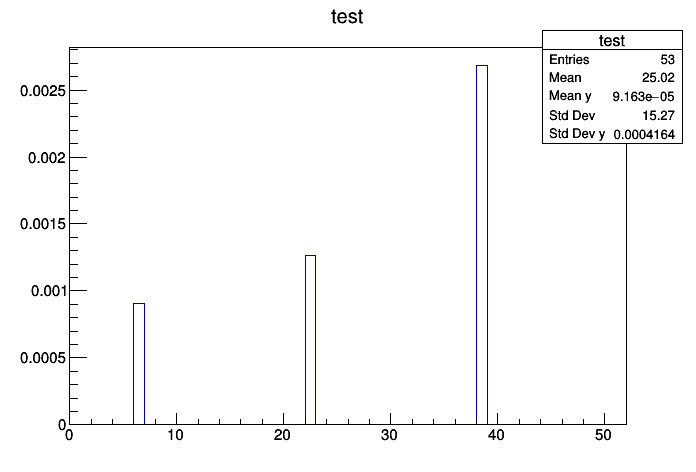

In [161]:
c = ROOT.TCanvas()

prof.Draw()
c.Draw()

In [115]:
test = pd.DataFrame(columns=['pt', 'energy', 'eta', 'phi'], dtype=object)

In [116]:
import math
math.pi

3.141592653589793

In [131]:
test = test.append([{'pt': 20., 'energy': 20., 'phi': 0, 'eta':2.}], ignore_index=True)
test = test.append([{'pt': 30., 'energy': 20., 'phi': math.pi, 'eta':-2.}], ignore_index=True)

In [132]:
test['momentum'] = ROOT.TLorentzVector()
test = test.apply(fill_momentum, axis=1)

10.0 10.0
10.0 10.0
10.0 10.0
20.0 20.0
10.0 10.0
20.0 20.0
30.0 30.0
20.0 20.0
30.0 30.0


In [133]:
test

,pt,energy,eta,phi,momentum
0,10.0,20.0,2.0,0.000000,"<ROOT.TLorentzVector object (""TLorentzVector"")..."
1,10.0,20.0,-2.0,3.141593,"<ROOT.TLorentzVector object (""TLorentzVector"")..."
2,20.0,20.0,2.0,0.000000,"<ROOT.TLorentzVector object (""TLorentzVector"")..."
3,10.0,20.0,-2.0,3.141593,"<ROOT.TLorentzVector object (""TLorentzVector"")..."
4,20.0,20.0,2.0,0.000000,"<ROOT.TLorentzVector object (""TLorentzVector"")..."
5,30.0,20.0,-2.0,3.141593,"<ROOT.TLorentzVector object (""TLorentzVector"")..."
6,20.0,20.0,2.0,0.000000,"<ROOT.TLorentzVector object (""TLorentzVector"")..."
7,30.0,20.0,-2.0,3.141593,"<ROOT.TLorentzVector object (""TLorentzVector"")..."


In [134]:
test.momentum.sum().Pt(), test.momentum.sum().Eta(), test.momentum.sum().Phi()

(10.0, -2.0000000000000004, 3.1415926535897922)

In [200]:

tc_geom_df = pd.DataFrame()
tc_rod_bins = pd.DataFrame()

# read the geometry dump
geom_file = '/eos/cms/store/cmst3/user/cerminar/hgcal/CMSSW932/geom/test_triggergeom.root'

tc_geom_tree = HGCalNtuple([geom_file], tree='hgcaltriggergeomtester/TreeTriggerCells')
print ('read TC GEOM tree with # events: {}'.format(tc_geom_tree.nevents()))


read TC GEOM tree with # events: 1410740


In [201]:
tc_geom_df = convertGeomTreeToDF(tc_geom_tree._tree)
tc_geom_df['radius'] = np.sqrt(tc_geom_df['x']**2+tc_geom_df['y']**2)
tc_geom_df['eta'] = np.arcsinh(tc_geom_df.z/tc_geom_df.radius)


tc_rod_bins = pd.read_csv(filepath_or_buffer='../TCmapping_v2.txt',
                          sep=' ',
                          names=['id', 'rod_x', 'rod_y'],
                          index_col=False)
tc_rod_bins['rod_bin'] = tc_rod_bins.apply(func=lambda cell: (int(cell.rod_x), int(cell.rod_y)), axis=1)

tc_geom_df = pd.merge(tc_geom_df, tc_rod_bins, on='id')


In [673]:
# input_files = listFiles(os.path.join('/eos/cms/store/cmst3/user/cerminar/hgcal/CMSSW932/', 'photonPt35_PU0/NTP/v5/'))
#input_files = listFiles(os.path.join('/eos/cms/store/cmst3/user/cerminar/hgcal/CMSSW932/', 'SinglePiPt5Eta1p6_2p8_PU0/NTP/v4/'))
input_files = listFiles(os.path.join('/eos/cms/store/cmst3/group/l1tr/cerminar/hgcal/CMSSW932/', 'SinglePiPt5Eta1p6_2p8_PU0/NTP/v7/'))

ntuple = HGCalNtuple(input_files, tree='hgcalTriggerNtuplizer/HGCalTriggerNtuple')
nevents = ntuple.nevents()
print '# of events: {}'.format(nevents)

# of events: 6000


In [876]:
evt_idx = 359


In [877]:
#evt_idx +=1

event = ntuple.getEvent(evt_idx)
print ("--- Event {}, @ {}".format(event.entry(), datetime.datetime.now()))
print ('    run: {}, lumi: {}, event: {}'.format(event.run(), event.lumi(), event.event()))

# get the interesting data-frames
genParts = event.getDataFrame(prefix='gen')


branches = [(event, 'genpart'), (event, 'hgcdigi'), (event, 'tc'), (event, 'cl'), (event, 'cl3d'), (event, 'tower')]

dataframes = []

for event, name in branches:
    dataframes.append(event.getDataFrame(name))

genParticles = dataframes[0]
hgcDigis = dataframes[1]
triggerCells = dataframes[2]
triggerClusters = dataframes[3]
trigger3DClusters = dataframes[4]
triggerTowers = dataframes[5]



--- Event 359, @ 2018-05-08 11:46:06.153989
    run: 1, lumi: 15, event: 14360


In [878]:
import copy 
print triggerCells.columns
print triggerClusters.columns
columns = ['id', 'eta', 'phi', 'x', 'y', 'subdet', 'layer', 'pt', 'energy']
columns_tc = copy.copy(columns)
columns_2dcl = copy.copy(columns)
columns_tc.extend(['mipPt','cluster', 'zside'])
columns_2dcl.extend(['cells', 'ncells','rod_bin_max', 'rod_bin_shares', 'rod_bins'])

print columns_2dcl


#hgcDigis[hgcDigis.layer == 13]

Index([u'n', u'id', u'subdet', u'zside', u'layer', u'wafer', u'wafertype',
       u'cell', u'data', u'pt', u'mipPt', u'energy', u'eta', u'phi', u'x',
       u'y', u'z', u'cluster', u'multicluster'],
      dtype='object')
Index([u'n', u'id', u'mipPt', u'pt', u'energy', u'eta', u'phi', u'layer',
       u'subdet', u'cells', u'multicluster'],
      dtype='object')
['id', 'eta', 'phi', 'x', 'y', 'subdet', 'layer', 'pt', 'energy', 'cells', 'ncells', 'rod_bin_max', 'rod_bin_shares', 'rod_bins']


In [879]:
# these towers are eta-phi....can not be easily compared
#triggerTowers.sort_values(by='energy', axis=0, ascending=False).iloc[:10]

In [880]:
if not tc_rod_bins.empty:
    triggerCells = pd.merge(triggerCells,
                            tc_rod_bins,
                            on='id')

genParticles['pdgid'] = genParticles.pid
# this is not needed anymore in recent versions of the ntuples
# tcsWithPos = pd.merge(triggerCells, tc_geom_df[['id', 'x', 'y']], on='id')
triggerClusters['ncells'] = [len(x) for x in triggerClusters.cells]
if 'x' not in triggerClusters.columns:
    triggerClusters = pd.merge(triggerClusters, tc_geom_df[['z', 'id']], on='id')
    triggerClusters['R'] = triggerClusters.z/np.sinh(triggerClusters.eta)
    triggerClusters['x'] = triggerClusters.R*np.cos(triggerClusters.phi)
    triggerClusters['y'] = triggerClusters.R*np.sin(triggerClusters.phi)

trigger3DClusters['nclu'] = [len(x) for x in trigger3DClusters.clusters]

In [905]:

triggerCells[triggerCells.zside > 0 ][columns_tc]

,id,eta,phi,x,y,subdet,layer,pt,energy,mipPt,cluster,zside
24,1738292527,2.207990,2.658944,-66.910461,35.059860,3,19,0.275722,1.269333,13.800637,1738292527,1
25,1739341099,2.190279,2.643406,-68.035004,37.007629,3,21,0.332862,1.506133,13.310580,1739341099,1
26,1739341103,2.214640,2.658944,-66.910461,35.059860,3,21,0.388820,1.801659,15.548263,1739341099,1
27,1740389648,2.208210,2.680428,-68.597275,34.085976,3,23,0.224938,1.035764,8.994897,1740389648,1
28,1740389675,2.197445,2.643406,-68.035004,37.007629,3,23,0.409999,1.868176,16.395155,1740389648,1
29,1741438224,2.215330,2.680428,-68.597275,34.085976,3,25,0.063325,0.293625,2.532266,1741438225,1
30,1741438225,2.185751,2.660734,-70.002960,36.520687,3,25,0.140273,0.631911,5.609282,1741438225,1
31,1741438251,2.204561,2.643406,-68.035004,37.007629,3,25,0.124468,0.571095,4.977267,1741438225,1
32,1741438255,2.228939,2.658944,-66.910461,35.059860,3,25,0.118507,0.556842,4.738879,1741438225,1
37,1762409749,2.187830,2.672198,-72.195824,36.618080,4,29,0.106470,0.480607,2.112900,0,1


In [882]:
dbsClusters = pd.DataFrame()
for zside in [-1,1]:
    for layer in range (1, 53):
        # print layer
        dbsClusters = dbsClusters.append(buildDBSCANClusters(layer, zside, triggerCells[(triggerCells.zside == zside) & (triggerCells.layer == layer)]), ignore_index=True)

In [883]:
computeClusterRodSharing(dbsClusters, triggerCells)
computeClusterRodSharing(triggerClusters, triggerCells)


In [884]:
seeds = getClusterSeeds(triggerClusters[(triggerClusters.eta > 0)])
new3Dclusters = pd.DataFrame()
for seed in seeds:
    print seed
    components = getClusterComponents(seed, triggerClusters[(triggerClusters.eta > 0)])
    new3Dclusters = new3Dclusters.append(build3D(components), ignore_index=True)


(21, 41)
(21, 41)
[(20, 40), (20, 41), (20, 42), (21, 40), (21, 41), (21, 42), (22, 40), (22, 41), (22, 42)]


In [885]:
seeds = getClusterSeeds(triggerClusters[(triggerClusters.eta < 0)])
for seed in seeds:
    components = getClusterComponents(seed, triggerClusters[(triggerClusters.eta < 0)])
    new3Dclusters = new3Dclusters.append(build3D(components), ignore_index=True)


(46, 28)
[(45, 27), (45, 28), (45, 29), (46, 27), (46, 28), (46, 29), (47, 27), (47, 28), (47, 29)]
(40, 18)
[(39, 17), (39, 18), (39, 19), (40, 17), (40, 18), (40, 19), (41, 17), (41, 18), (41, 19)]
(48, 29)
[(47, 28), (47, 29), (47, 30), (48, 28), (48, 29), (48, 30), (49, 28), (49, 29), (49, 30)]
(51, 40)
[(50, 39), (50, 40), (50, 41), (51, 39), (51, 40), (51, 41), (52, 39), (52, 40), (52, 41)]


In [886]:
dbsseeds = getClusterSeeds(dbsClusters[(dbsClusters.eta > 0)])
new3DDBSclusters = pd.DataFrame()
for seed in dbsseeds:
    print seed
    components = getClusterComponents(seed, dbsClusters[(dbsClusters.eta > 0)])
    new3DDBSclusters = new3DDBSclusters.append(build3D(components), ignore_index=True)


(21, 41)
(21, 41)
[(20, 40), (20, 41), (20, 42), (21, 40), (21, 41), (21, 42), (22, 40), (22, 41), (22, 42)]
(30, 41)
(30, 41)
[(29, 40), (29, 41), (29, 42), (30, 40), (30, 41), (30, 42), (31, 40), (31, 41), (31, 42)]


In [887]:
dbsseeds = getClusterSeeds(dbsClusters[(dbsClusters.eta  < 0)])

for seed in dbsseeds:
    print seed
    components = getClusterComponents(seed, dbsClusters[(dbsClusters.eta < 0)])
    new3DDBSclusters = new3DDBSclusters.append(build3D(components), ignore_index=True)


(46, 28)
(46, 28)
[(45, 27), (45, 28), (45, 29), (46, 27), (46, 28), (46, 29), (47, 27), (47, 28), (47, 29)]
(40, 18)
(40, 18)
[(39, 17), (39, 18), (39, 19), (40, 17), (40, 18), (40, 19), (41, 17), (41, 18), (41, 19)]
(48, 29)
(48, 29)
[(47, 28), (47, 29), (47, 30), (48, 28), (48, 29), (48, 30), (49, 28), (49, 29), (49, 30)]
(44, 26)
(44, 26)
[(43, 25), (43, 26), (43, 27), (44, 25), (44, 26), (44, 27), (45, 25), (45, 26), (45, 27)]
(51, 40)
(51, 40)
[(50, 39), (50, 40), (50, 41), (51, 39), (51, 40), (51, 41), (52, 39), (52, 40), (52, 41)]


In [888]:
new3DClDBetaphi = build3DClustersEtaPhi(dbsClusters)


In [889]:
triggerClusters[(triggerClusters.eta > 0)][columns_2dcl].sort_values(by='layer',ascending=True)

,id,eta,phi,x,y,subdet,layer,pt,energy,cells,ncells,rod_bin_max,rod_bin_shares,rod_bins
7,1738292527,2.207990,2.658944,-66.910454,35.059864,3,19,0.231830,1.067268,[1738292527],1,"(21, 41)","[0.0, 0.0, 0.0, 0.0, 1.26933, 0.0, 0.0, 0.0, 0.0]","[(21, 41)]"
8,1739341099,2.203505,2.651778,-67.422173,35.946159,3,21,0.687952,3.153267,"[1739341099, 1739341103]",2,"(21, 41)","[0.0, 0.0, 0.0, 0.0, 3.30779, 0.0, 0.0, 0.0, 0.0]","[(21, 41)]"
9,1740389648,2.201425,2.656522,-68.235611,35.965179,3,23,0.764611,3.497534,"[1740389648, 1740389675]",2,"(21, 41)","[0.0, 1.03576, 0.0, 0.0, 1.86818, 0.0, 0.0, 0....","[(21, 40), (21, 41)]"
10,1741438225,2.206851,2.658222,-68.415146,35.911270,3,25,0.490412,2.255183,"[1741438225, 1741438224, 1741438251, 1741438255]",4,"(21, 41)","[0.0, 0.293625, 0.0, 0.0, 1.75985, 0.0, 0.0, 0...","[(21, 40), (21, 41)]"


In [890]:
triggerClusters[(triggerClusters.eta > 0)][['pt', 'energy', 'ncells', 'rod_bin_max']].groupby('rod_bin_max').sum()

,pt,energy,ncells
rod_bin_max,,,
"(21, 41)",2.174804,9.973252,9


In [891]:
dbsClusters[dbsClusters.eta > 0][columns_2dcl].sort_values(by='layer',ascending=True)

,id,eta,phi,x,y,subdet,layer,pt,energy,cells,ncells,rod_bin_max,rod_bin_shares,rod_bins
20,1738292527,2.207990,2.658944,-66.910461,35.059860,3,19,0.275722,1.269333,[1738292527],1,"(21, 41)","[0.0, 0.0, 0.0, 0.0, 1.26933, 0.0, 0.0, 0.0, 0.0]","[(21, 41)]"
21,1739341099,2.203498,2.651773,-67.422493,35.946735,3,21,0.721669,3.307792,"[1739341099, 1739341103]",2,"(21, 41)","[0.0, 0.0, 0.0, 0.0, 3.30779, 0.0, 0.0, 0.0, 0.0]","[(21, 41)]"
22,1740389648,2.208210,2.680428,-68.597275,34.085976,3,23,0.224938,1.035764,[1740389648],1,"(21, 40)","[0.0, 0.0, 0.0, 0.0, 1.03576, 0.0, 0.0, 0.0, 0.0]","[(21, 40)]"
23,1740389675,2.197445,2.643406,-68.035004,37.007629,3,23,0.409999,1.868176,[1740389675],1,"(21, 41)","[0.0, 0.0, 0.0, 0.0, 1.86818, 0.0, 0.0, 0.0, 0.0]","[(21, 41)]"
24,1741438224,2.206837,2.658221,-68.416054,35.911842,3,25,0.446554,2.053473,"[1741438224, 1741438225, 1741438251, 1741438255]",4,"(21, 41)","[0.0, 0.293625, 0.0, 0.0, 1.75985, 0.0, 0.0, 0...","[(21, 40), (21, 41)]"
25,1762409749,2.187830,2.672198,-72.195824,36.618080,4,29,0.106470,0.480607,[1762409749],1,"(21, 41)","[0.0, 0.0, 0.0, 0.0, 0.480607, 0.0, 0.0, 0.0, ...","[(21, 41)]"
26,1762934035,2.178680,2.631578,-72.252052,40.416229,4,30,0.204028,0.912805,[1762934035],1,"(21, 41)","[0.0, 0.0, 0.0, 0.0, 0.912805, 0.0, 0.0, 0.0, ...","[(21, 41)]"
27,1764496670,2.847551,2.072574,-20.991514,38.262856,4,33,0.142813,1.235584,[1764496670],1,"(30, 41)","[0.0, 0.0, 0.0, 0.0, 1.23558, 0.0, 0.0, 0.0, 0.0]","[(30, 41)]"
28,1766079744,2.174564,2.649142,-78.957680,42.363998,4,36,0.104371,0.465079,[1766079744],1,"(21, 41)","[0.0, 0.0, 0.0, 0.0, 0.465079, 0.0, 0.0, 0.0, ...","[(21, 41)]"


In [892]:
dbsClusters[(dbsClusters.eta > 0)][['pt', 'energy', 'ncells', 'rod_bin_max']].groupby('rod_bin_max').sum()

,pt,energy,ncells
rod_bin_max,,,
"(21, 40)",0.224938,1.035764,1
"(21, 41)",2.268814,10.357265,11
"(30, 41)",0.142813,1.235584,1


In [893]:
triggerClusters[(triggerClusters.eta < 0)][columns_2dcl].sort_values(by='layer',ascending=True)

,id,eta,phi,x,y,subdet,layer,pt,energy,cells,ncells,rod_bin_max,rod_bin_shares,rod_bins
0,1717327375,-2.174995,-0.457080,68.316139,-33.599022,3,11,0.501131,2.233978,[1717327375],1,"(47, 27)","[0.0, 0.0, 0.0, 0.0, 2.2324, 0.0, 0.0, 0.0, 0.0]","[(47, 27)]"
1,1719434778,-1.977063,0.322580,89.738716,29.995659,3,15,0.090922,0.334593,[1719434778],1,"(51, 40)","[0.0, 0.0, 0.0, 0.0, 0.367482, 0.0, 0.0, 0.0, ...","[(51, 40)]"
2,1719417092,-2.283636,-0.420665,63.000782,-28.184656,3,15,0.261332,1.295450,"[1719417092, 1719424813, 1719417096]",3,"(46, 29)","[0.0, 0.490211, 0.0, 0.0, 0.932458, 0.0, 0.0, ...","[(46, 28), (46, 29)]"
3,1720465668,-2.269636,-0.439481,63.770958,-29.981716,3,17,0.225484,1.102532,"[1720465668, 1720473390, 1720465665]",3,"(46, 28)","[0.0, 0.0, 0.0, 0.0, 0.713803, 0.270145, 0.0, ...","[(46, 28), (47, 28)]"
4,1721521965,-2.272436,-0.406302,64.962769,-27.949675,3,19,0.160140,0.785170,"[1721521965, 1721521966]",2,"(46, 29)","[0.0, 0.0, 0.416785, 0.0, 0.516995, 0.0, 0.0, ...","[(46, 29), (47, 28)]"
5,1722570518,-2.185315,-0.365018,72.715561,-27.787720,3,21,0.193721,0.872315,"[1722570518, 1722570514]",2,"(48, 29)","[0.0, 0.0, 0.0, 0.0, 0.915083, 0.0, 0.0, 0.0, ...","[(48, 29)]"
6,1722562820,-2.288579,-0.436430,63.474361,-29.606102,3,21,0.143298,0.713793,[1722562820],1,"(46, 28)","[0.0, 0.0, 0.0, 0.0, 0.748791, 0.0, 0.0, 0.0, ...","[(46, 28)]"
11,1745631492,-2.329483,-0.436430,63.474339,-29.606085,4,29,0.600736,3.114807,[1745631492],1,"(46, 28)","[0.0, 0.0, 0.0, 0.0, 1.99136, 0.0, 0.0, 0.0, 0.0]","[(46, 28)]"
12,1751436303,-2.046001,-1.194891,39.359093,-99.725830,4,40,0.907000,3.567299,[1751436303],1,"(40, 18)","[0.0, 0.0, 0.0, 0.0, 3.00769, 0.0, 0.0, 0.0, 0.0]","[(40, 18)]"


In [894]:
triggerClusters[(triggerClusters.eta < 0)][['pt', 'energy', 'ncells', 'rod_bin_max']].groupby('rod_bin_max').sum()

,pt,energy,ncells
rod_bin_max,,,
"(40, 18)",0.907000,3.567299,1
"(46, 28)",0.969519,4.931132,5
"(46, 29)",0.421472,2.080620,5
"(47, 27)",0.501131,2.233978,1
"(48, 29)",0.193721,0.872315,2
"(51, 40)",0.090922,0.334593,1


In [895]:
dbsClusters[dbsClusters.eta < 0][columns_2dcl].sort_values(by='layer',ascending=True)

,id,eta,phi,x,y,subdet,layer,pt,energy,cells,ncells,rod_bin_max,rod_bin_shares,rod_bins
0,1717327375,-2.174995,-0.457080,68.316139,-33.599026,3,11,0.500776,2.232399,[1717327375],1,"(47, 27)","[0.0, 0.0, 0.0, 0.0, 2.2324, 0.0, 0.0, 0.0, 0.0]","[(47, 27)]"
1,1719434778,-1.977063,0.322580,89.738731,29.995661,3,15,0.099859,0.367482,[1719434778],1,"(51, 40)","[0.0, 0.0, 0.0, 0.0, 0.367482, 0.0, 0.0, 0.0, ...","[(51, 40)]"
2,1719417364,-2.395327,-0.398086,56.778301,-23.877493,3,15,0.052408,0.289894,[1719417364],1,"(45, 29)","[0.0, 0.0, 0.0, 0.0, 0.289894, 0.0, 0.0, 0.0, ...","[(45, 29)]"
3,1719424771,-2.195159,-0.321293,71.689781,-23.860176,3,15,0.040647,0.184799,[1719424771],1,"(48, 29)","[0.0, 0.0, 0.0, 0.0, 0.184799, 0.0, 0.0, 0.0, ...","[(48, 29)]"
4,1719424813,-2.283629,-0.420668,63.001125,-28.185038,3,15,0.286998,1.422669,"[1719424813, 1719417092, 1719417096]",3,"(46, 29)","[0.0, 0.490211, 0.0, 0.0, 0.932458, 0.0, 0.0, ...","[(46, 28), (46, 29)]"
5,1720473371,-2.110035,-0.342534,78.176460,-27.876989,3,17,0.221299,0.926110,"[1720473371, 1720473374, 1720482340]",3,"(49, 29)","[0.0, 0.381589, 0.0, 0.0, 0.544522, 0.0, 0.0, ...","[(49, 28), (49, 29)]"
6,1720473390,-2.269629,-0.439473,63.771687,-29.981386,3,17,0.201234,0.983948,"[1720473390, 1720465665, 1720465668]",3,"(46, 28)","[0.0, 0.0, 0.0, 0.0, 0.713803, 0.270145, 0.0, ...","[(46, 28), (47, 28)]"
11,1721514246,-2.346544,-0.466974,58.551331,-29.519535,3,19,0.050107,0.264191,[1721514246],1,"(45, 28)","[0.0, 0.0, 0.0, 0.0, 0.264191, 0.0, 0.0, 0.0, ...","[(45, 28)]"
10,1721521966,-2.255130,-0.417950,65.785919,-29.216545,3,19,0.086457,0.416785,[1721521966],1,"(47, 28)","[0.0, 0.0, 0.0, 0.0, 0.416785, 0.0, 0.0, 0.0, ...","[(47, 28)]"
9,1721521965,-2.286503,-0.396619,64.300049,-26.929722,3,19,0.104001,0.516995,[1721521965],1,"(46, 29)","[0.0, 0.0, 0.0, 0.0, 0.516995, 0.0, 0.0, 0.0, ...","[(46, 29)]"


In [896]:
dbsClusters[(dbsClusters.eta < 0)][['pt', 'energy', 'ncells', 'rod_bin_max']].groupby('rod_bin_max').sum()

,pt,energy,ncells
rod_bin_max,,,
"(40, 18)",0.764718,3.007695,1
"(44, 26)",0.113644,0.590026,1
"(45, 28)",0.256564,1.367887,2
"(45, 29)",0.052408,0.289894,1
"(46, 28)",0.819537,4.145055,6
"(46, 29)",0.390999,1.939664,4
"(47, 27)",0.500776,2.232399,1
"(47, 28)",0.086457,0.416785,1
"(47, 30)",0.159307,0.758375,2


In [897]:
trigger3DClusters

,n,id,pt,energy,eta,phi,clusters,showerlength,coreshowerlength,firstlayer,...,seetot,seemax,spptot,sppmax,szz,srrtot,srrmax,srrmean,emaxe,nclu
0,NaN,1717327375,0.501131,2.233977,-2.174995,-0.457080,[1717327375],1,1,11,...,2.384186e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1
1,NaN,1719417092,0.790255,3.896011,-2.278052,-0.424548,"[1719417092, 1720465668, 1721521965, 1722562820]",7,4,15,...,1.441091e-02,0.015596,0.018391,0.019102,2.475754,0.003060,0.003325,0.002622,0.332507,4
2,NaN,1738292527,2.174804,9.974965,2.204185,2.655608,"[1738292527, 1739341099, 1740389648, 1741438225]",7,4,19,...,1.122179e-02,0.016764,0.012389,0.017734,2.395228,0.002566,0.003826,0.002503,0.350631,4
3,NaN,1745631492,0.600736,3.114807,-2.329483,-0.436430,[1745631492],1,1,29,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1
4,NaN,1751436303,0.907000,3.567299,-2.046001,-1.194891,[1751436303],1,1,40,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1


In [898]:
new3Dclusters

,energy,eta,phi,pt,layers,clusters,nclu,firstlayer,showerlength,seetot,seemax,spptot,sppmax,szz,emaxe,id
0,10.811005,2.204012,2.655665,2.357481,"[19, 21, 23, 25]","[1738292527, 1739341099, 1740389648, 1741438225]",4,19,1,1,1,1,1,1,1,1738292527
1,10.022371,-2.270592,-0.437016,2.047809,"[11, 15, 17, 19, 21, 29]","[1717327375, 1719417092, 1720465668, 172152196...",6,11,1,1,1,1,1,1,1,1717327375
2,3.866953,-2.046001,-1.194891,0.983188,[40],[1751436303],1,40,1,1,1,1,1,1,1,1751436303
3,0.945589,-2.185315,-0.365018,0.209993,[21],[1722570518],1,21,1,1,1,1,1,1,1,1722570518
4,0.362699,-1.977063,0.322580,0.098560,[15],[1719434778],1,15,1,1,1,1,1,1,1,1719434778


In [899]:
new3DDBSclusters

,energy,eta,phi,pt,layers,clusters,nclu,firstlayer,showerlength,seetot,seemax,spptot,sppmax,szz,emaxe,id
0,12.350043,2.200206,2.654104,2.703111,"[19, 21, 23, 23, 25, 29, 30, 36]","[1738292527, 1739341099, 1740389648, 174038967...",8,19,1,1,1,1,1,1,1,1738292527
1,1.339373,2.847551,2.072574,0.154810,[33],[1764496670],1,33,1,1,1,1,1,1,1,1764496670
2,11.264585,-2.280493,-0.445239,2.279418,"[11, 15, 15, 17, 19, 19, 19, 21, 23, 29, 33]","[1717327375, 1719417364, 1719424813, 172047339...",11,11,1,1,1,1,1,1,1,1717327375
3,3.260341,-2.046001,-1.194891,0.828955,[40],[1751436303],1,40,1,1,1,1,1,1,1,1751436303
4,3.848602,-2.180376,-0.344162,0.858811,"[15, 17, 19, 19, 19, 21, 21]","[1719424771, 1720473371, 1721521920, 172152195...",7,15,1,1,1,1,1,1,1,1719424771
5,0.639588,-2.330836,-0.655464,0.123190,[32],[1747211530],1,32,1,1,1,1,1,1,1,1747211530
6,0.398350,-1.977063,0.322580,0.108248,[15],[1719434778],1,15,1,1,1,1,1,1,1,1719434778


In [900]:
new3DClDBetaphi

,energy,eta,phi,pt,layers,clusters,nclu,firstlayer,showerlength,seetot,seemax,spptot,sppmax,szz,emaxe,id
0,4.888997,-2.280226,-0.425850,0.989560,"[15, 17, 19, 19, 21, 23]","[1719424813, 1720473390, 1721521965, 172152196...",6,15,1,1,1,1,1,1,1,1719424813
1,3.260341,-2.046001,-1.194891,0.828955,[40],[1751436303],1,40,1,1,1,1,1,1,1,1751436303
2,12.350043,2.200206,2.654104,2.703111,"[19, 21, 23, 23, 25, 29, 30, 36]","[1738292527, 1739341099, 1740389648, 174038967...",8,19,1,1,1,1,1,1,1,1738292527


In [901]:
# tcs_in_3Dcl = np.concatenate(triggerClusters.cells)
# tcs_in_3Dcl

In [902]:
# triggerCells['used_3D'] = triggerCells.id.isin(tcs_in_3Dcl)


In [903]:
# triggerCells[['used_3D', 'id']]

In [904]:


# triggerCells[~triggerCells.used_3D]